In [41]:
import pandas as pd

In [42]:
data = pd.read_csv('heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [44]:
data = pd.get_dummies(data, columns=['cp', 'restecg', 'slope', 'thal', 'ca'], dtype=int)
data

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_0,...,slope_2,thal_0,thal_1,thal_2,thal_3,ca_0,ca_1,ca_2,ca_3,ca_4
0,63,1,145,233,1,150,0,2.3,1,0,...,0,0,1,0,0,1,0,0,0,0
1,37,1,130,250,0,187,0,3.5,1,0,...,0,0,0,1,0,1,0,0,0,0
2,41,0,130,204,0,172,0,1.4,1,0,...,1,0,0,1,0,1,0,0,0,0
3,56,1,120,236,0,178,0,0.8,1,0,...,1,0,0,1,0,1,0,0,0,0
4,57,0,120,354,0,163,1,0.6,1,1,...,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,0,1,...,0,0,0,0,1,1,0,0,0,0
299,45,1,110,264,0,132,0,1.2,0,0,...,0,0,0,0,1,1,0,0,0,0
300,68,1,144,193,1,141,0,3.4,0,1,...,0,0,0,0,1,0,0,1,0,0
301,57,1,130,131,0,115,1,1.2,0,1,...,0,0,0,0,1,0,1,0,0,0


In [45]:
from sklearn.model_selection import train_test_split

x = data.drop('target', axis=1)
y = data['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [46]:
from sklearn.preprocessing import StandardScaler
import joblib

standard = StandardScaler()
x_train[['age', 'trestbps', 'chol', 'thalach']] = standard.fit_transform(x_train[['age', 'trestbps', 'chol', 'thalach']])
x_test[['age', 'trestbps', 'chol', 'thalach']] = standard.transform(x_test[['age', 'trestbps', 'chol', 'thalach']])

joblib.dump(standard, 'scaler.pkl')

x_train

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_0,cp_1,...,slope_2,thal_0,thal_1,thal_2,thal_3,ca_0,ca_1,ca_2,ca_3,ca_4
19,1.559337,0,0.456108,-0.157454,0,0.058689,0,1.8,0,0,...,1,0,0,1,0,0,0,1,0,0
151,1.781426,0,-1.086603,-1.794635,0,-1.113399,0,1.6,1,0,...,0,0,0,1,0,1,0,0,0,0
80,-1.549908,1,-1.086603,0.042646,0,1.320938,0,0.0,0,0,...,1,0,0,1,0,1,0,0,0,0
82,0.559936,0,-1.637571,1.279627,0,0.464412,0,0.0,0,0,...,1,0,0,1,0,0,1,0,0,0
258,0.782025,0,1.007076,-0.066500,0,0.193930,1,1.4,1,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,0.893070,1,-0.094860,1.497918,1,-0.797836,1,1.8,1,0,...,1,0,0,0,1,0,0,0,1,0
203,1.448292,1,2.659980,0.479227,1,0.013609,1,1.6,0,0,...,0,0,0,0,1,1,0,0,0,0
47,-0.883642,1,0.345914,0.169982,0,0.284091,0,0.0,0,0,...,1,0,0,1,0,1,0,0,0,0
94,-1.105731,0,-1.086603,-1.594535,0,-0.527355,0,0.0,0,1,...,0,0,0,1,0,1,0,0,0,0


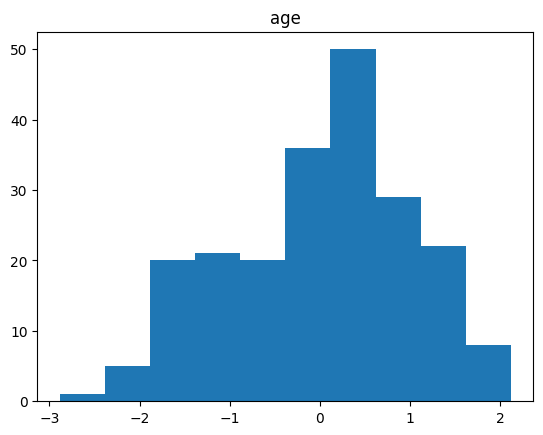

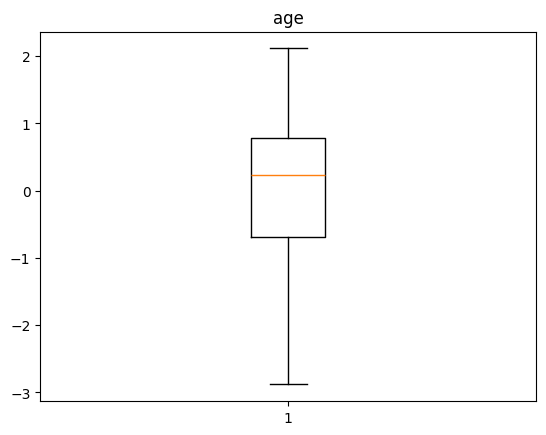

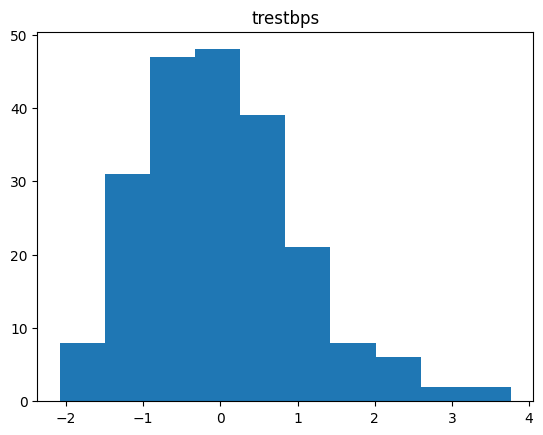

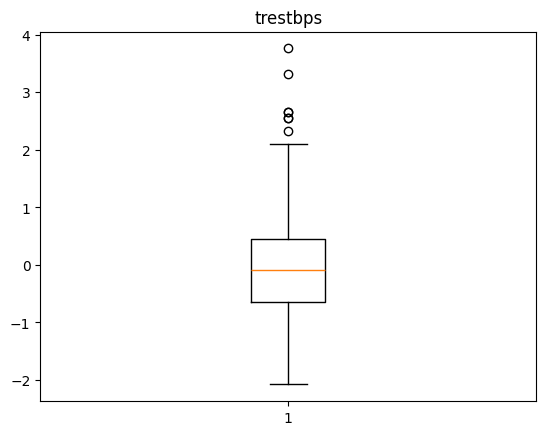

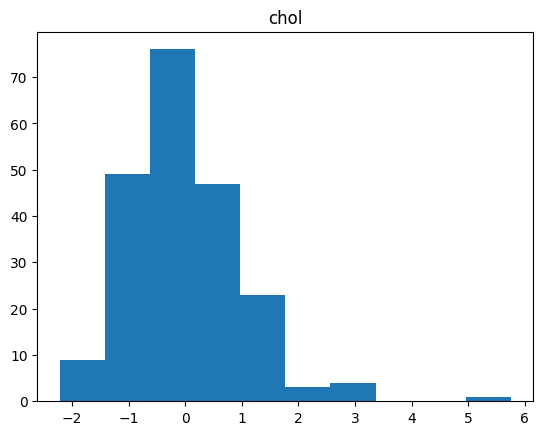

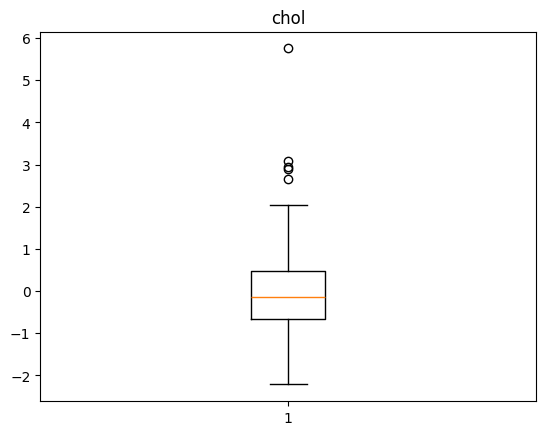

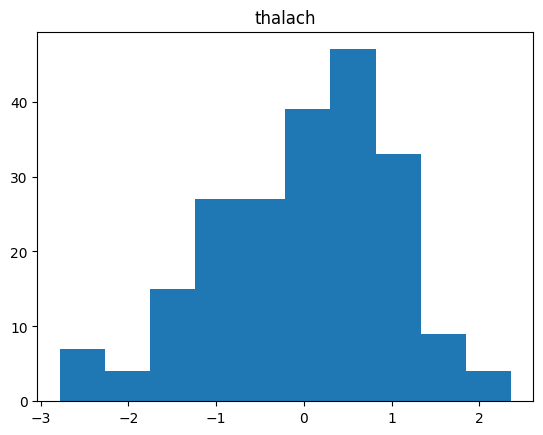

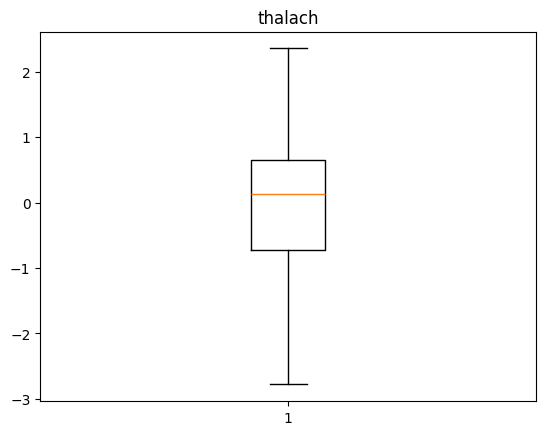

In [47]:
import matplotlib.pyplot as plt

num_variables = ['age', 'trestbps', "chol", "thalach"]
for i in num_variables:
    plt.hist(x_train[i])
    plt.title(i)
    plt.show()
    plt.boxplot(x_train[i])
    plt.title(i)
    plt.show()

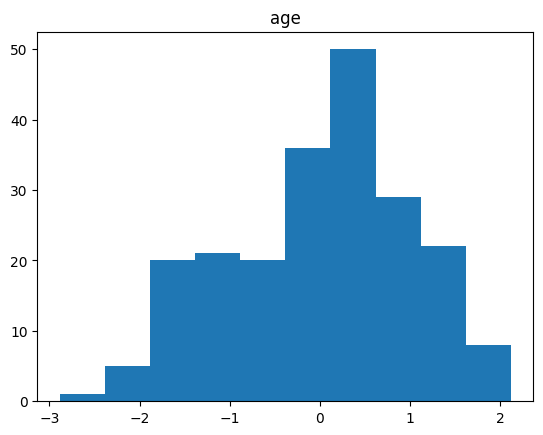

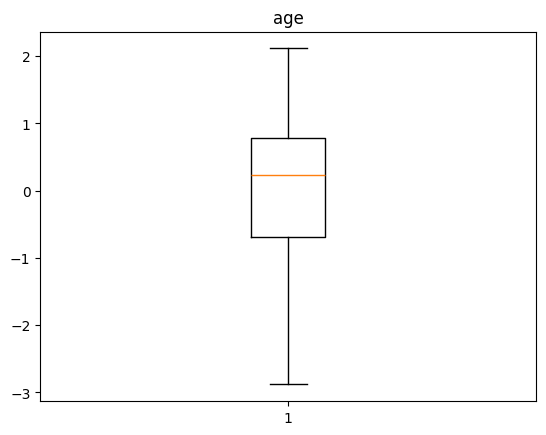

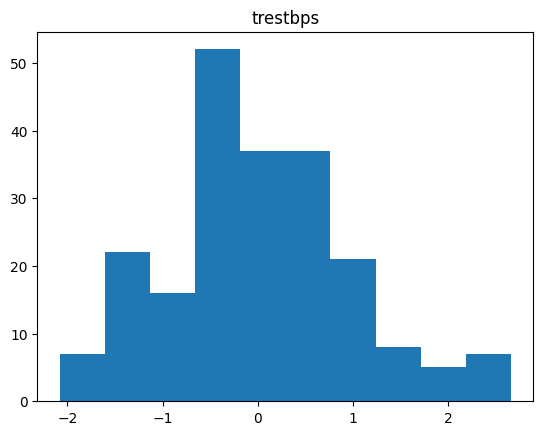

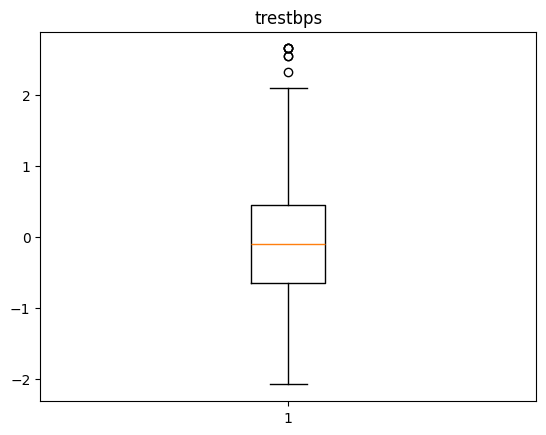

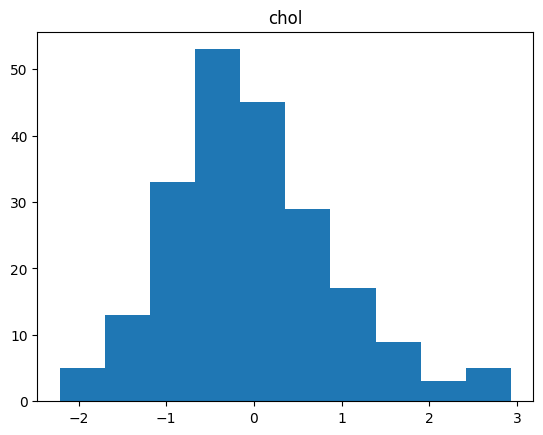

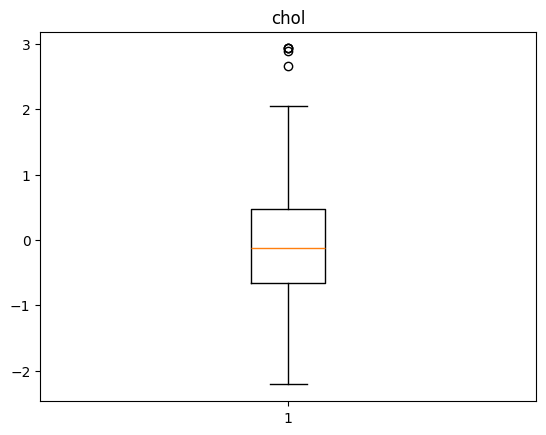

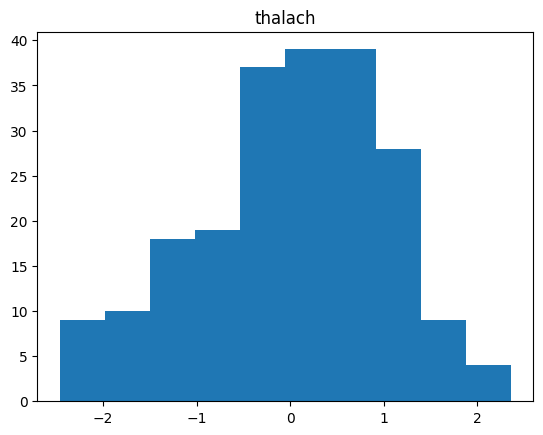

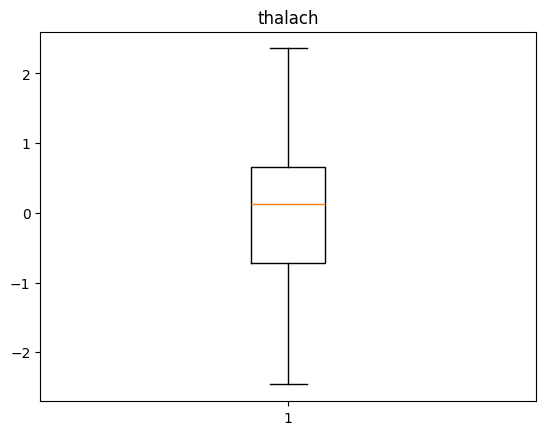

In [48]:
import numpy as np

x_train['trestbps'] = np.where(x_train['trestbps'] > x_train['trestbps'].quantile(0.99), x_train['trestbps'].quantile(0.99), x_train['trestbps'])
x_test['trestbps'] = np.where(x_test['trestbps'] > x_train['trestbps'].quantile(0.99), x_train['trestbps'].quantile(0.99), x_test['trestbps'])

x_train['chol'] = np.where(x_train['chol'] > x_train['chol'].quantile(0.99), x_train['chol'].quantile(0.99), x_train['chol'])
x_test['chol'] = np.where(x_test['chol'] > x_train['chol'].quantile(0.99), x_train['chol'].quantile(0.99), x_test['chol'])

x_train['thalach'] = np.where(x_train['thalach'] < x_train['thalach'].quantile(0.01), x_train['thalach'].quantile(0.01), x_train['thalach'])
x_test['thalach'] = np.where(x_test['thalach'] < x_train['thalach'].quantile(0.01), x_train['thalach'].quantile(0.01), x_test['thalach'])

for i in num_variables:
    plt.hist(x_train[i])
    plt.title(i)
    plt.show()
    plt.boxplot(x_train[i])
    plt.title(i)
    plt.show()


<Axes: >

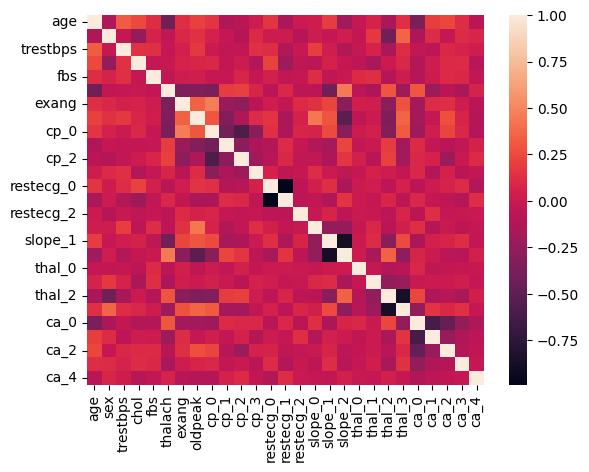

In [49]:
import seaborn as sns

sns.heatmap(x_train.corr())

In [50]:
x_train[['age', 'trestbps', 'chol', 'thalach']].describe()

,age,trestbps,chol,thalach
count,2.120000e+02,212.000000,212.000000,212.000000
mean,1.885284e-17,-0.008316,-0.014043,0.002622
std,1.002367e+00,0.975905,0.940181,0.995504
min,-2.882442e+00,-2.078345,-2.213026,-2.460849
25%,-6.893138e-01,-0.645828,-0.653156,-0.718946
50%,2.268031e-01,-0.094860,-0.130168,0.126310
75%,7.820254e-01,0.456108,0.479227,0.656004
max,2.114559e+00,2.659980,2.930997,2.357785


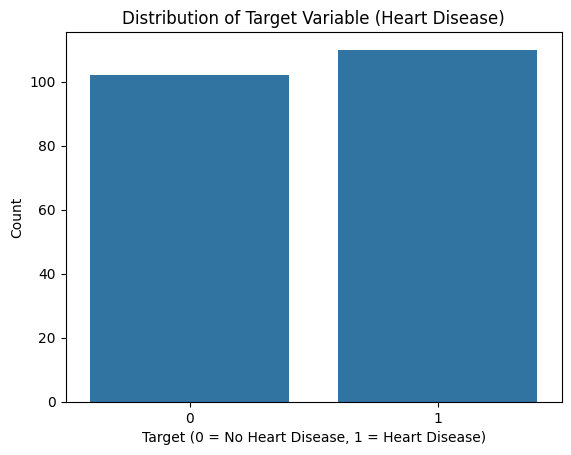

In [51]:
sns.countplot(x=y_train)
plt.title('Distribution of Target Variable (Heart Disease)')
plt.xlabel('Target (0 = No Heart Disease, 1 = Heart Disease)')
plt.ylabel('Count')
plt.show()

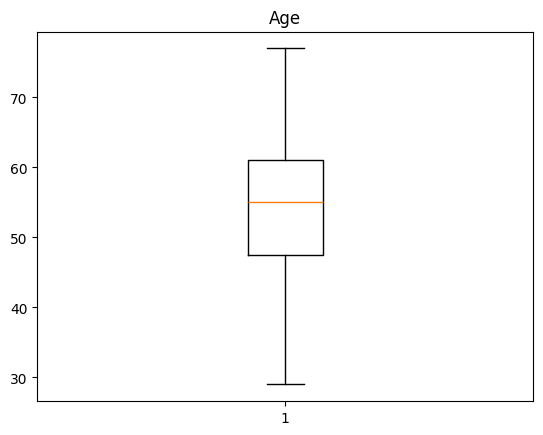

In [52]:
plt.boxplot(data['age'])
plt.title('Age')
plt.show()

In [53]:
x_train['age_range'] = pd.cut(data.loc[x_train.index, 'age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])
x_test['age_range'] = pd.cut(data.loc[x_test.index, 'age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

x_train['age_chol'] = x_train['age'] * x_train['chol']
x_test['age_chol'] = x_test['age'] * x_test['chol']

x_train

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_0,cp_1,...,thal_1,thal_2,thal_3,ca_0,ca_1,ca_2,ca_3,ca_4,age_range,age_chol
19,1.559337,0,0.456108,-0.157454,0,0.058689,0,1.8,0,0,...,0,1,0,0,0,1,0,0,60-70,-0.245524
151,1.781426,0,-1.086603,-1.794635,0,-1.113399,0,1.6,1,0,...,0,1,0,1,0,0,0,0,70-80,-3.197009
80,-1.549908,1,-1.086603,0.042646,0,1.320938,0,0.0,0,0,...,0,1,0,1,0,0,0,0,40-50,-0.066097
82,0.559936,0,-1.637571,1.279627,0,0.464412,0,0.0,0,0,...,0,1,0,0,1,0,0,0,50-60,0.716510
258,0.782025,0,1.007076,-0.066500,0,0.193930,1,1.4,1,0,...,0,1,0,1,0,0,0,0,60-70,-0.052004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,0.893070,1,-0.094860,1.497918,1,-0.797836,1,1.8,1,0,...,0,0,1,0,0,0,1,0,60-70,1.337745
203,1.448292,1,2.659980,0.479227,1,0.013609,1,1.6,0,0,...,0,0,1,1,0,0,0,0,60-70,0.694061
47,-0.883642,1,0.345914,0.169982,0,0.284091,0,0.0,0,0,...,0,1,0,1,0,0,0,0,40-50,-0.150203
94,-1.105731,0,-1.086603,-1.594535,0,-0.527355,0,0.0,0,1,...,0,1,0,1,0,0,0,0,40-50,1.763126


In [54]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

x_train['age_range'] = label.fit_transform(x_train['age_range'])
x_test['age_range'] = label.transform(x_test['age_range'])

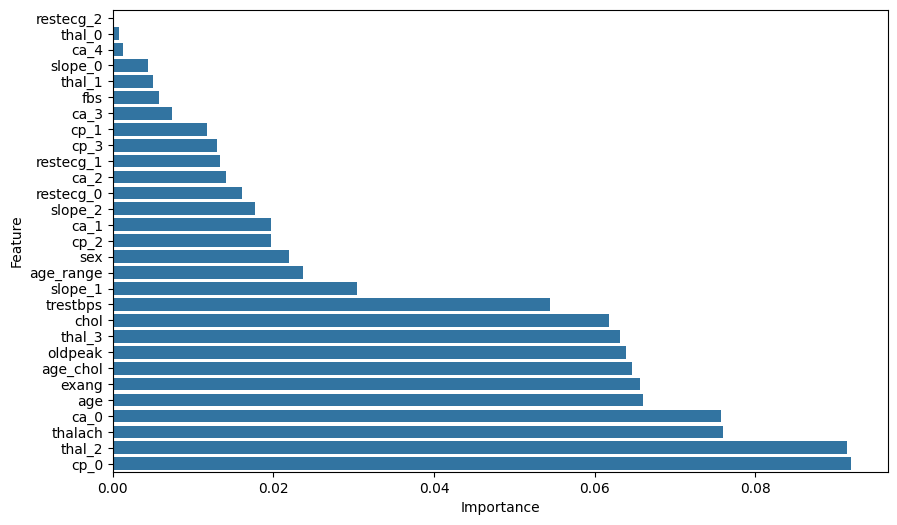

In [55]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

importance = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance')

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance)
plt.show()

In [56]:
threshold = 0.03

important_features = importance[importance['Importance'] > threshold]['Feature'].tolist()

x_train = x_train[important_features]
x_test = x_test[important_features]

print("Selected features:", important_features)

joblib.dump(important_features, 'features.pkl')

x_train

Selected features: ['slope_1', 'trestbps', 'chol', 'thal_3', 'oldpeak', 'age_chol', 'exang', 'age', 'ca_0', 'thalach', 'thal_2', 'cp_0']


,slope_1,trestbps,chol,thal_3,oldpeak,age_chol,exang,age,ca_0,thalach,thal_2,cp_0
19,0,0.456108,-0.157454,0,1.8,-0.245524,0,1.559337,0,0.058689,1,0
151,1,-1.086603,-1.794635,0,1.6,-3.197009,0,1.781426,1,-1.113399,1,1
80,0,-1.086603,0.042646,0,0.0,-0.066097,0,-1.549908,1,1.320938,1,0
82,0,-1.637571,1.279627,0,0.0,0.716510,0,0.559936,0,0.464412,1,0
258,1,1.007076,-0.066500,0,1.4,-0.052004,1,0.782025,1,0.193930,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
217,0,-0.094860,1.497918,1,1.8,1.337745,1,0.893070,0,-0.797836,0,1
203,1,2.659980,0.479227,1,1.6,0.694061,1,1.448292,1,0.013609,0,0
47,0,0.345914,0.169982,0,0.0,-0.150203,0,-0.883642,1,0.284091,1,0
94,1,-1.086603,-1.594535,0,0.0,1.763126,0,-1.105731,1,-0.527355,1,0


Logistic Regression Results:
Accuracy: 0.8901098901098901
Precision: 0.9090909090909091
Recall: 0.9090909090909091
F1 Score: 0.9090909090909091
AUC Score: 0.9313131313131313
K-fold cross vaditation accuracy: [0.74418605 0.76744186 0.80952381 0.83333333 0.95238095]
K-fold cross vaditation mean accuracy: 0.8213732004429678


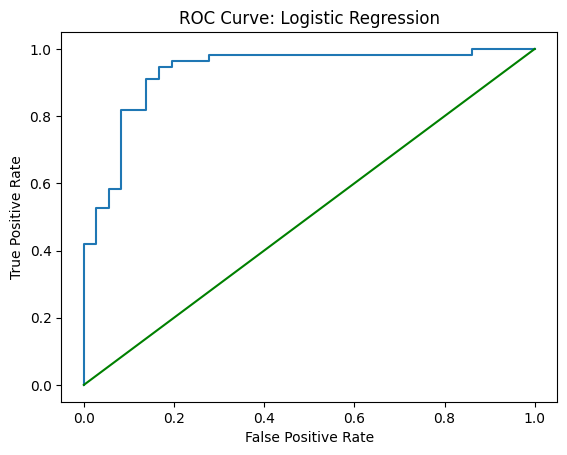

Decision Tree Classifier Results:
Accuracy: 0.8021978021978022
Precision: 0.8245614035087719
Recall: 0.8545454545454545
F1 Score: 0.8392857142857143
AUC Score: 0.7883838383838384
K-fold cross vaditation accuracy: [0.74418605 0.72093023 0.61904762 0.66666667 0.83333333]
K-fold cross vaditation mean accuracy: 0.7168327796234772


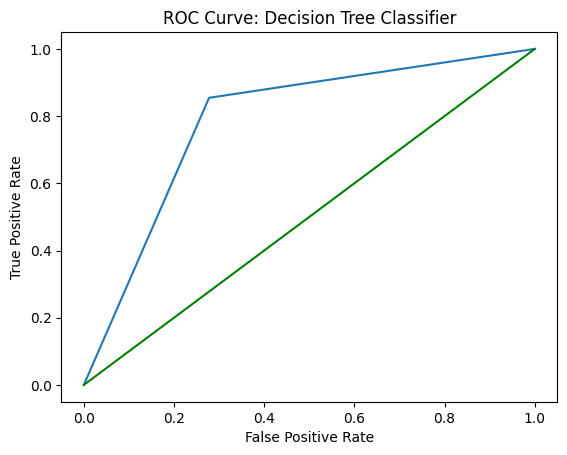

Random Forest Classifier Results:
Accuracy: 0.8131868131868132
Precision: 0.8518518518518519
Recall: 0.8363636363636363
F1 Score: 0.8440366972477065
AUC Score: 0.9103535353535354
K-fold cross vaditation accuracy: [0.69767442 0.76744186 0.71428571 0.78571429 0.92857143]
K-fold cross vaditation mean accuracy: 0.7787375415282393


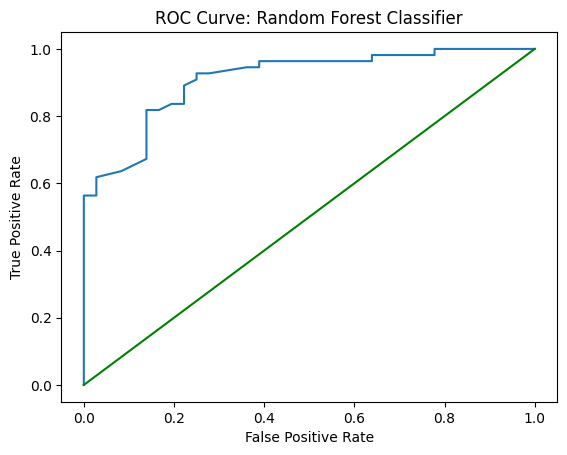

SVC Results:
Accuracy: 0.8681318681318682
Precision: 0.864406779661017
Recall: 0.9272727272727272
F1 Score: 0.8947368421052632
AUC Score: 0.9232323232323232
K-fold cross vaditation accuracy: [0.72093023 0.76744186 0.76190476 0.78571429 0.95238095]
K-fold cross vaditation mean accuracy: 0.7976744186046512


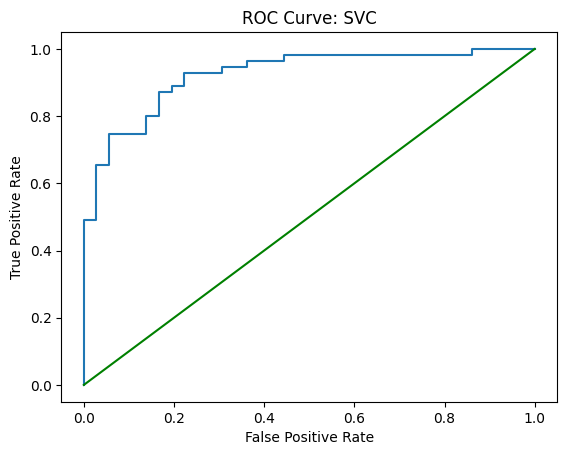

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import cross_val_score

lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
lr_model_predict = lr_model.predict(x_test)
lr_model_probs = lr_model.predict_proba(x_test)[:, 1]
lr_cross_valid = cross_val_score(lr_model, x_train, y_train, cv=5)

print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, lr_model_predict):}")
print(f"Precision: {precision_score(y_test, lr_model_predict):}")
print(f"Recall: {recall_score(y_test, lr_model_predict):}")
print(f"F1 Score: {f1_score(y_test, lr_model_predict):}")
print(f"AUC Score: {roc_auc_score(y_test, lr_model_probs)}")
print(f"K-fold cross vaditation accuracy: {lr_cross_valid}")
print(f"K-fold cross vaditation mean accuracy: {lr_cross_valid.mean()}")

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_model_probs)
plt.plot(lr_fpr, lr_tpr)
plt.plot([0, 1], [0, 1], color='green', linestyle='-')
plt.title("ROC Curve: Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


dtc_model = DecisionTreeClassifier()
dtc_model.fit(x_train, y_train)
dtc_model_predict = dtc_model.predict(x_test)
dtc_model_probs = dtc_model.predict_proba(x_test)[:, 1]
dtc_cross_valid = cross_val_score(dtc_model, x_train, y_train, cv=5)

print("Decision Tree Classifier Results:")
print(f"Accuracy: {accuracy_score(y_test, dtc_model_predict):}")
print(f"Precision: {precision_score(y_test, dtc_model_predict):}")
print(f"Recall: {recall_score(y_test, dtc_model_predict):}")
print(f"F1 Score: {f1_score(y_test, dtc_model_predict):}")
print(f"AUC Score: {roc_auc_score(y_test, dtc_model_probs)}")
print(f"K-fold cross vaditation accuracy: {dtc_cross_valid}")
print(f"K-fold cross vaditation mean accuracy: {dtc_cross_valid.mean()}")

dtc_fpr, dtc_tpr, _ = roc_curve(y_test, dtc_model_probs)
plt.plot(dtc_fpr, dtc_tpr)
plt.plot([0, 1], [0, 1], color='green', linestyle='-')
plt.title("ROC Curve: Decision Tree Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


rfc_model = RandomForestClassifier()
rfc_model.fit(x_train, y_train)
rfc_model_predict = rfc_model.predict(x_test)
rfc_model_probs = rfc_model.predict_proba(x_test)[:, 1]
rfc_cross_valid = cross_val_score(rfc_model, x_train, y_train, cv=5)

print("Random Forest Classifier Results:")
print(f"Accuracy: {accuracy_score(y_test, rfc_model_predict):}")
print(f"Precision: {precision_score(y_test, rfc_model_predict):}")
print(f"Recall: {recall_score(y_test, rfc_model_predict):}")
print(f"F1 Score: {f1_score(y_test, rfc_model_predict):}")
print(f"AUC Score: {roc_auc_score(y_test, rfc_model_probs)}")
print(f"K-fold cross vaditation accuracy: {rfc_cross_valid}")
print(f"K-fold cross vaditation mean accuracy: {rfc_cross_valid.mean()}")

rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rfc_model_probs)
plt.plot(rfc_fpr, rfc_tpr)
plt.plot([0, 1], [0, 1], color='green', linestyle='-')
plt.title("ROC Curve: Random Forest Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


svc_model = SVC(probability=True)
svc_model.fit(x_train, y_train)
svc_model_predict = svc_model.predict(x_test)
svc_model_probs = svc_model.predict_proba(x_test)[:, 1]
svc_cross_valid = cross_val_score(svc_model, x_train, y_train, cv=5)

print("SVC Results:")
print(f"Accuracy: {accuracy_score(y_test, svc_model_predict):}")
print(f"Precision: {precision_score(y_test, svc_model_predict):}")
print(f"Recall: {recall_score(y_test, svc_model_predict):}")
print(f"F1 Score: {f1_score(y_test, svc_model_predict):}")
print(f"AUC Score: {roc_auc_score(y_test, svc_model_probs)}")
print(f"K-fold cross vaditation accuracy: {svc_cross_valid}")
print(f"K-fold cross vaditation mean accuracy: {svc_cross_valid.mean()}")

svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_model_probs)
plt.plot(svc_fpr, svc_tpr)
plt.plot([0, 1], [0, 1], color='green', linestyle='-')
plt.title("ROC Curve: SVC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Logistic Regression with Hyperparameters Results:
Best Parameters: {'C': 1, 'class_weight': 'balanced', 'max_iter': 500, 'penalty': 'l1', 'solver': 'saga'}
Accuracy: 0.8901098901098901
Precision: 0.9090909090909091
Recall: 0.9090909090909091
F1 Score: 0.9090909090909091
AUC Score: 0.9323232323232323
K-fold cross validation accuracy: [0.76744186 0.74418605 0.80952381 0.83333333 0.95238095]
K-fold cross validation mean accuracy: 0.8213732004429678


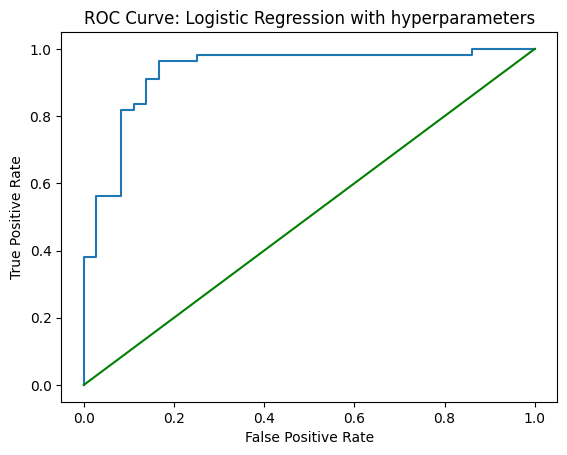

Decision Tree Classifier with Hyperparameters Results:
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Accuracy: 0.8351648351648352
Precision: 0.8703703703703703
Recall: 0.8545454545454545
F1 Score: 0.8623853211009175
AUC Score: 0.8815656565656566
K-fold cross validation accuracy: [0.81395349 0.6744186  0.76190476 0.64285714 0.83333333]
K-fold cross validation mean accuracy: 0.7452934662236987


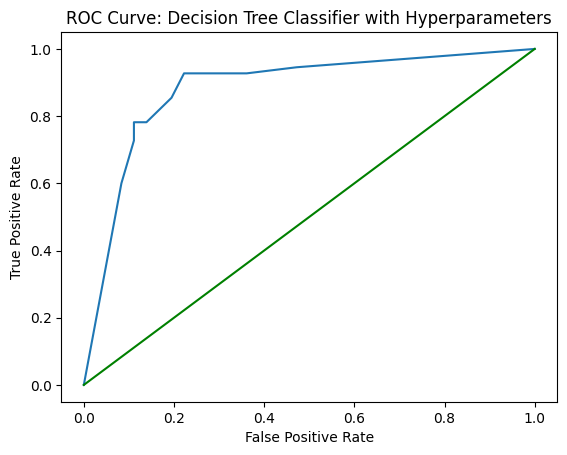

Random Forest Classifier with Hyperparameters Results:
Best Parameters: {'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.8461538461538461
Precision: 0.8867924528301887
Recall: 0.8545454545454545
F1 Score: 0.8703703703703703
AUC Score: 0.9242424242424242
K-fold cross validation accuracy: [0.74418605 0.74418605 0.80952381 0.85714286 0.95238095]
K-fold cross validation mean accuracy: 0.8214839424141749


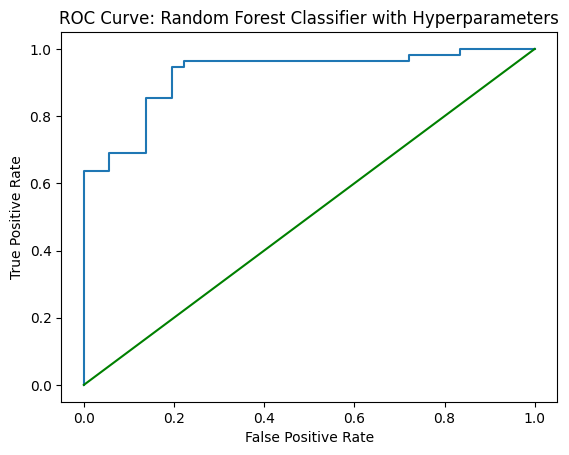

SVC with Hyperparameters Results:
Best Parameters: {'C': 1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.9010989010989011
Precision: 0.896551724137931
Recall: 0.9454545454545454
F1 Score: 0.9203539823008849
AUC Score: 0.9292929292929293
K-fold cross validation accuracy: [0.74418605 0.74418605 0.83333333 0.83333333 0.92857143]
K-fold cross validation mean accuracy: 0.8167220376522704


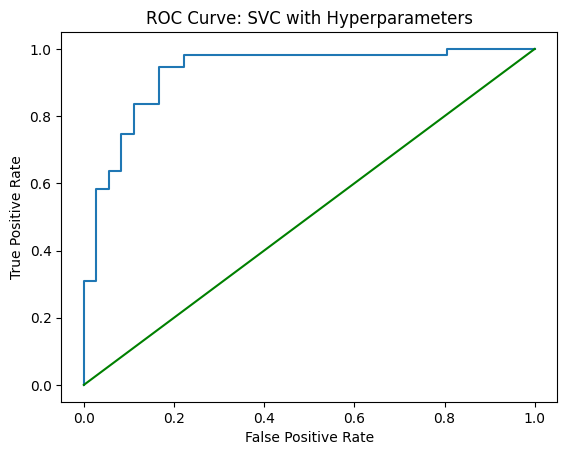

In [58]:
from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2'],      
    'max_iter': [500, 1000],
    'class_weight': ['balanced']
}

grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='roc_auc')
grid_search_lr.fit(x_train, y_train)
best_model_lr = grid_search_lr.best_estimator_

print("Logistic Regression with Hyperparameters Results:")
print("Best Parameters:", grid_search_lr.best_params_)

best_lr_model_predict = best_model_lr.predict(x_test)
best_lr_model_probs = best_model_lr.predict_proba(x_test)[:, 1]
best_lr_cross_valid = cross_val_score(best_model_lr, x_train, y_train, cv=5)

print(f"Accuracy: {accuracy_score(y_test, best_lr_model_predict):}")
print(f"Precision: {precision_score(y_test, best_lr_model_predict):}")
print(f"Recall: {recall_score(y_test, best_lr_model_predict):}")
print(f"F1 Score: {f1_score(y_test, best_lr_model_predict):}")
print(f"AUC Score: {roc_auc_score(y_test, best_lr_model_probs)}")
print(f"K-fold cross validation accuracy: {best_lr_cross_valid}")
print(f"K-fold cross validation mean accuracy: {best_lr_cross_valid.mean()}")

best_lr_fpr, best_lr_tpr, _ = roc_curve(y_test, best_lr_model_probs)
plt.plot(best_lr_fpr, best_lr_tpr)
plt.plot([0, 1], [0, 1], color='green', linestyle='-')
plt.title("ROC Curve: Logistic Regression with hyperparameters")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

param_grid_dtc = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dtc = GridSearchCV(DecisionTreeClassifier(), param_grid_dtc, cv=5, scoring='roc_auc')
grid_search_dtc.fit(x_train, y_train)
best_model_dtc = grid_search_dtc.best_estimator_

print("Decision Tree Classifier with Hyperparameters Results:")
print("Best Parameters:", grid_search_dtc.best_params_)

best_dtc_model_predict = best_model_dtc.predict(x_test)
best_dtc_model_probs = best_model_dtc.predict_proba(x_test)[:, 1]
best_dtc_cross_valid = cross_val_score(best_model_dtc, x_train, y_train, cv=5)

print(f"Accuracy: {accuracy_score(y_test, best_dtc_model_predict):}")
print(f"Precision: {precision_score(y_test, best_dtc_model_predict):}")
print(f"Recall: {recall_score(y_test, best_dtc_model_predict):}")
print(f"F1 Score: {f1_score(y_test, best_dtc_model_predict):}")
print(f"AUC Score: {roc_auc_score(y_test, best_dtc_model_probs)}")
print(f"K-fold cross validation accuracy: {best_dtc_cross_valid}")
print(f"K-fold cross validation mean accuracy: {best_dtc_cross_valid.mean()}")

best_dtc_fpr, best_dtc_tpr, _ = roc_curve(y_test, best_dtc_model_probs)
plt.plot(best_dtc_fpr, best_dtc_tpr)
plt.plot([0, 1], [0, 1], color='green', linestyle='-')
plt.title("ROC Curve: Decision Tree Classifier with Hyperparameters")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

param_grid_rfc = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rfc = GridSearchCV(RandomForestClassifier(), param_grid_rfc, cv=5, scoring='roc_auc')
grid_search_rfc.fit(x_train, y_train)
best_model_rfc = grid_search_rfc.best_estimator_

print("Random Forest Classifier with Hyperparameters Results:")
print("Best Parameters:", grid_search_rfc.best_params_)

best_rfc_model_predict = best_model_rfc.predict(x_test)
best_rfc_model_probs = best_model_rfc.predict_proba(x_test)[:, 1]
best_rfc_cross_valid = cross_val_score(best_model_rfc, x_train, y_train, cv=5)

print(f"Accuracy: {accuracy_score(y_test, best_rfc_model_predict):}")
print(f"Precision: {precision_score(y_test, best_rfc_model_predict):}")
print(f"Recall: {recall_score(y_test, best_rfc_model_predict):}")
print(f"F1 Score: {f1_score(y_test, best_rfc_model_predict):}")
print(f"AUC Score: {roc_auc_score(y_test, best_rfc_model_probs)}")
print(f"K-fold cross validation accuracy: {best_rfc_cross_valid}")
print(f"K-fold cross validation mean accuracy: {best_rfc_cross_valid.mean()}")

best_rfc_fpr, best_rfc_tpr, _ = roc_curve(y_test, best_rfc_model_probs)
plt.plot(best_rfc_fpr, best_rfc_tpr)
plt.plot([0, 1], [0, 1], color='green', linestyle='-')
plt.title("ROC Curve: Random Forest Classifier with Hyperparameters")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

param_grid_svc = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'class_weight': ['balanced', None]
}

grid_search_svc = GridSearchCV(SVC(probability=True), param_grid_svc, cv=5, scoring='roc_auc')
grid_search_svc.fit(x_train, y_train)
best_model_svc = grid_search_svc.best_estimator_

print("SVC with Hyperparameters Results:")
print("Best Parameters:", grid_search_svc.best_params_)

best_svc_model_predict = best_model_svc.predict(x_test)
best_svc_model_probs = best_model_svc.predict_proba(x_test)[:, 1]
best_svc_cross_valid = cross_val_score(best_model_svc, x_train, y_train, cv=5)

print(f"Accuracy: {accuracy_score(y_test, best_svc_model_predict):}")
print(f"Precision: {precision_score(y_test, best_svc_model_predict):}")
print(f"Recall: {recall_score(y_test, best_svc_model_predict):}")
print(f"F1 Score: {f1_score(y_test, best_svc_model_predict):}")
print(f"AUC Score: {roc_auc_score(y_test, best_svc_model_probs)}")
print(f"K-fold cross validation accuracy: {best_svc_cross_valid}")
print(f"K-fold cross validation mean accuracy: {best_svc_cross_valid.mean()}")

best_svc_fpr, best_svc_tpr, _ = roc_curve(y_test, best_svc_model_probs)
plt.plot(best_svc_fpr, best_svc_tpr)
plt.plot([0, 1], [0, 1], color='green', linestyle='-')
plt.title("ROC Curve: SVC with Hyperparameters")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [59]:
choose_model = [
    ("Logistic Regression", f1_score(y_test, lr_model_predict), roc_auc_score(y_test, lr_model_probs)),
    ("Logistic Regression with Hyperparameters", f1_score(y_test, best_lr_model_predict), roc_auc_score(y_test, best_lr_model_probs)),
    ("Decision Tree Classifier", f1_score(y_test, dtc_model_predict), roc_auc_score(y_test, dtc_model_probs)),
    ("Decision Tree Classifier with Hyperparameters", f1_score(y_test, best_dtc_model_predict), roc_auc_score(y_test, best_dtc_model_probs)),
    ("Random Forest Classifier", f1_score(y_test, rfc_model_predict), roc_auc_score(y_test, rfc_model_probs)),
    ("Random Forest Classifier with Hyperparameters", f1_score(y_test, best_rfc_model_predict), roc_auc_score(y_test, best_rfc_model_probs)),
    ("SVC", f1_score(y_test, svc_model_predict), roc_auc_score(y_test, svc_model_probs)),
    ("SVC with Hyperparameters", f1_score(y_test, best_svc_model_predict), roc_auc_score(y_test, best_svc_model_probs)),
]

choose_model.sort(key=lambda x: (x[1], x[2]), reverse=True)

best_model, best_f1, best_auc = choose_model[0]

print(f"Best Performing Model: {best_model}")

if best_model == "Logistic Regression":
    joblib.dump(lr_model, 'model.pkl')
elif best_model == "Logistic Regression with Hyperparameters":
    joblib.dump(best_model_lr, 'model.pkl')
elif best_model == "Decision Tree Classifier":
    joblib.dump(dtc_model, 'model.pkl')
elif best_model == "Decision Tree Classifier with Hyperparameters":
    joblib.dump(best_model_dtc, 'model.pkl')
elif best_model == "Random Forest Classifier":
    joblib.dump(rfc_model, 'model.pkl')
elif best_model == "Random Forest Classifier with Hyperparameters":
    joblib.dump(best_model_rfc, 'model.pkl')
elif best_model == "SVC":
    joblib.dump(svc_model, 'model.pkl')
elif best_model == "SVC with Hyperparameters":
    joblib.dump(best_model_svc, 'model.pkl')


Best Performing Model: SVC with Hyperparameters


In [60]:
#Testing

model_test = joblib.load('model.pkl')
scaler_test = joblib.load("scaler.pkl")
features_test = joblib.load("features.pkl")

def encode_onehot(value, classes):
    return [1 if value == cls else 0 for cls in classes]

numerical = ['age', 'trestbps', 'chol', 'thalach']

test_input = {
    'age': 35,                     # int
    'sex': 1,                      # int (0 = female, 1 = male)
    'cp': 1,                       # int (0–3 categorical)
    'trestbps': 122,              # int
    'chol': 192,                  # int
    'fbs': 0,                      # int (0 or 1)
    'restecg': 1,                  # int (0–2)
    'thalach': 174,               # int
    'exang': 0,                    # int (0 or 1)
    'oldpeak': 0,                # float
    'slope': 2,                    # int (0–2)
    'ca': 0,                       # int (0–4)
    'thal': 2                      # int (0–2)
}

test_input.update({
    **dict(zip(['cp_0', 'cp_1', 'cp_2', 'cp_3'], encode_onehot(1, [0, 1, 2, 3]))),
    **dict(zip(['restecg_0', 'restecg_1', 'restecg_2'], encode_onehot(1, [0, 1, 2]))),
    **dict(zip(['slope_0', 'slope_1', 'slope_2'], encode_onehot(2, [0, 1, 2]))),
    **dict(zip(['thal_0', 'thal_1', 'thal_2'], encode_onehot(2, [0, 1, 2]))),
    **dict(zip(['ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4'], encode_onehot(0, [0, 1, 2, 3, 4])))
})

user_data = pd.DataFrame([test_input])

user_data[numerical] = scaler_test.transform(user_data[numerical])

for col in features_test:
    if col not in user_data.columns:
        user_data[col] = 0

user_data = user_data[features_test]

prediction_test = model_test.predict(user_data)[0]
chance_test = model_test.predict_proba(user_data)[0][1]

if prediction_test == 1:
    print(f"High risk of heart disease with a {chance_test*100:.2f}% chance.")
else:
    print(f"No heart disease predicted. Chance: {chance_test*100:.2f}%.")

High risk of heart disease with a 95.05% chance.
